# Bar Graph Classification

Teng-Jui Lin

- Created: 2023-05-27
- Edited: 2024-10-03

In [1]:
from bar_constants import *
from bar_data import *
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

/opt/miniconda3/envs/misused-bar-graphs/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'stixsans',
    'font.size': 8,

    'lines.linewidth': 0.5,

    'axes.linewidth': 0.5,
    'axes.spines.top': True,
    'axes.spines.right': True,
    'axes.titleweight': 'normal',
    'axes.titlesize': 8,
    'axes.labelweight': 'normal',

    'xtick.major.size': 2,
    'xtick.major.width': 0.5,
    'ytick.major.size': 2,
    'ytick.major.width': 0.5,

    'figure.dpi': 80,
    'savefig.dpi': 600,

    'legend.framealpha': 0,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 8,

    'animation.html': 'html5',
    'pdf.fonttype': 42,
})

## Prevalence of Misused Bar Graph

### Article figure

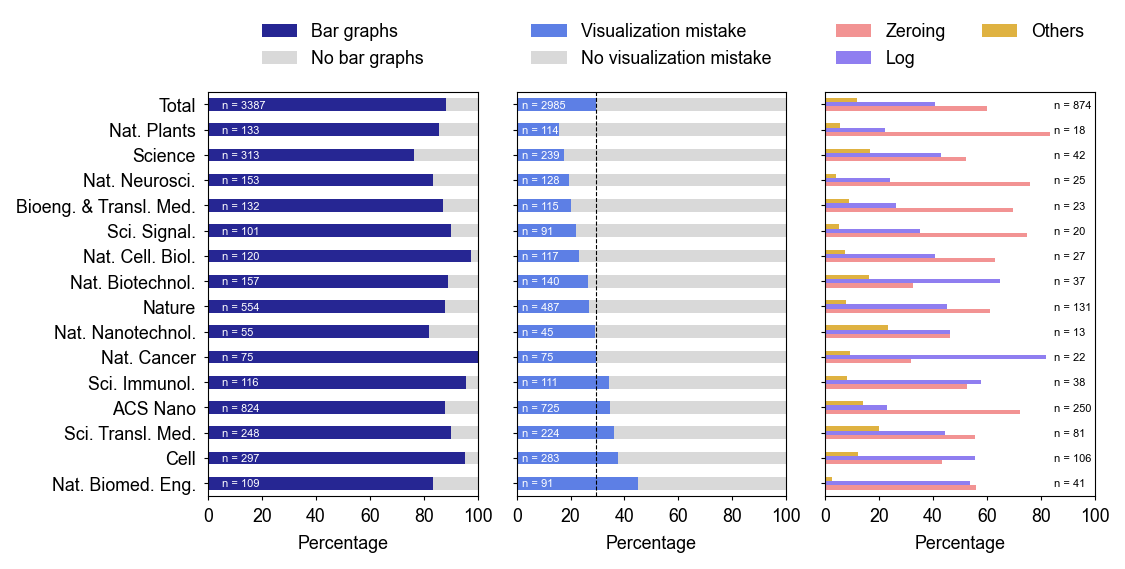

In [3]:
alpha = 0.85
total_misuse_percentage = percent_bar_correct_df.loc[TOTAL_LABEL, PERCENT_ARTICLES_INCORRECT_BAR_GRAPH_LABEL]
fig, axs = plt.subplots(1, 3, figsize=(7.08, 7.08/3*3), sharey=True)
percent_bar_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[0],
    legend=False,
    alpha=alpha,
    color=[ARTICLES_WITH_BAR_GRAPH_COLOR, ARTICLES_WITHOUT_BAR_GRAPH_COLOR], 
)
percent_bar_correct_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[1],
    legend=False,
    alpha=alpha,
    color=[ARTICLES_INCORRECT_BAR_GRAPH_COLOR, ARTICLES_CORRECT_BAR_GRAPH_COLOR], 
)
percent_bar_incorrect_df.plot(
    kind='barh', 
    stacked=False, 
    ax=axs[2],
    legend=True,
    alpha=alpha,
    color=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR, ARTICLES_OTHER_PROBLEM_COLOR], 
)

# iterable plot settings
for i in range(2):
    axs[i].set_xlim(0, 100)
for i in range(3):
    axs[i].set_box_aspect(1.5)
    axs[i].set_xlabel('Percentage')

# individual plot settings
axs[0].set_ylabel('')
axs[2].set_xlim(0, 100)

# plot legends
axs[0].legend(
    ['Bar graphs', 'No bar graphs'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[1].legend(
    ['Visualization mistake', 'No visualization mistake'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[2].legend(
    [ZERO_LABEL, LOG_LABEL, OTHERS_LABEL], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
    ncol=2,
)

# overlay n onto bars in subplot 1/3
for i in range(num_total_articles_series.shape[0]):
    try:
        axs[0].text(5, i - 0.15, f'n = {int(num_total_articles_series.iloc[i])}', fontsize=5, color='w')
    except ValueError:
        pass

# overlay n onto bars in subplot 2/3
for i in range(num_total_articles_series.shape[0]):
    try:
        axs[1].text(2, i - 0.15, f'n = {int(num_articles_bar_graph_series.iloc[i])}', fontsize=5, color='w')
    except ValueError:
        pass

# overlay n onto bars in subplot 3/3
for i in range(num_total_articles_series.shape[0]):
    try:
        axs[2].text(85, i - 0.15, f'n = {int(num_articles_misused_bar_graph_series.iloc[i])}', fontsize=5, color='k')
    except ValueError:
        pass

# add average line to subplot 2/3
axs[1].axvline(
    total_misuse_percentage,
    color='k',
    lw=0.5,
    ls='--'
)

axs[0].set_yticklabels(np.array([
    'Nat. Biomed. Eng.',
    'Cell',
    'Sci. Transl. Med.',
    'ACS Nano',
    'Sci. Immunol.',
    'Nat. Cancer',
    'Nat. Nanotechnol.',
    'Nature',
    'Nat. Biotechnol.',
    'Nat. Cell. Biol.',
    'Sci. Signal.',
    'Bioeng. & Transl. Med.',
    'Nat. Neurosci.',
    'Science',
    'Nat. Plants',
    'Total',
]))
plt.tight_layout()
fig.savefig(get_figure_filepath(article_categorization_filename, loc=FIG_ARTICLE_SUBPANELS_PATH))

### Poster figure

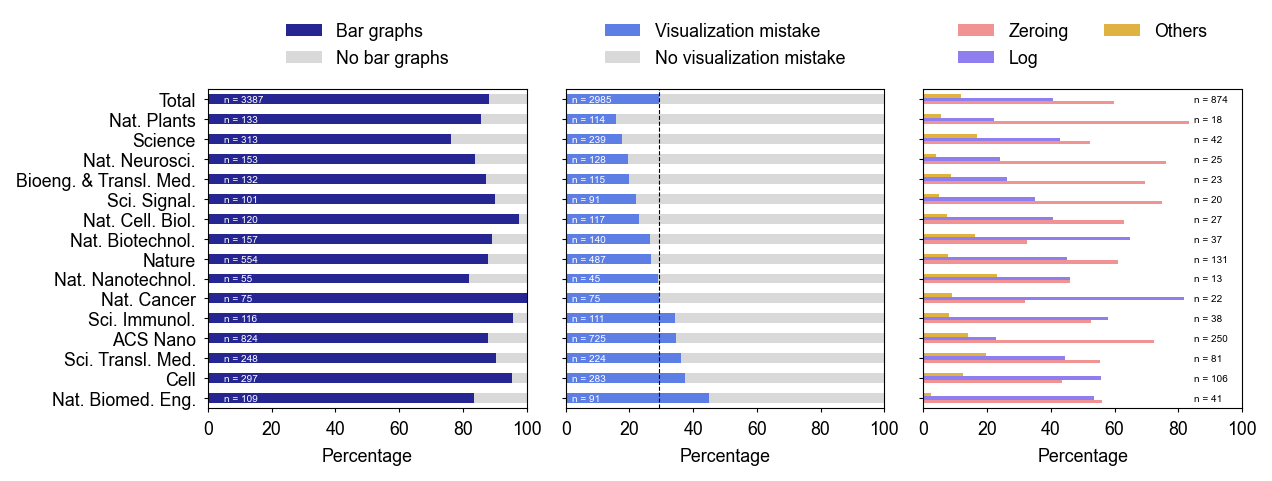

In [4]:
alpha = 0.85
fig, axs = plt.subplots(1, 3, figsize=(8, 8), sharey=True)
percent_bar_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[0],
    legend=False,
    alpha=alpha,
    color=[ARTICLES_WITH_BAR_GRAPH_COLOR, ARTICLES_WITHOUT_BAR_GRAPH_COLOR], 
)
percent_bar_correct_df.plot(
    kind='barh', 
    stacked=True, 
    ax=axs[1],
    legend=False,
    alpha=alpha,
    color=[ARTICLES_INCORRECT_BAR_GRAPH_COLOR, ARTICLES_CORRECT_BAR_GRAPH_COLOR], 
)
percent_bar_incorrect_df.plot(
    kind='barh', 
    stacked=False, 
    ax=axs[2],
    legend=True,
    alpha=alpha,
    color=[ARTICLES_ZERO_PROBLEM_COLOR, ARTICLES_LOG_PROBLEM_COLOR, ARTICLES_OTHER_PROBLEM_COLOR], 
)

# iterable plot settings
for i in range(2):
    axs[i].set_xlim(0, 100)
for i in range(3):
    axs[i].set_box_aspect(1)
    axs[i].set_xlabel('Percentage')

# individual plot settings
axs[0].set_ylabel('')
axs[2].set_xlim(0, 100)

# plot legends
axs[0].legend(
    ['Bar graphs', 'No bar graphs'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[1].legend(
    ['Visualization mistake', 'No visualization mistake'], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
)
axs[2].legend(
    [ZERO_LABEL, LOG_LABEL, OTHERS_LABEL], 
    bbox_to_anchor=(0.5, 1.02), 
    loc='lower center',
    ncol=2,
)

# overlay n onto bars in subplot 1/3
for i in range(num_total_articles_series.shape[0]):
    try:
        axs[0].text(5, i - 0.15, f'n = {int(num_total_articles_series.iloc[i])}', fontsize=4.5, color='w')
    except ValueError:
        pass

# overlay n onto bars in subplot 2/3
for i in range(num_total_articles_series.shape[0]):
    try:
        axs[1].text(2, i - 0.15, f'n = {int(num_articles_bar_graph_series.iloc[i])}', fontsize=4.5, color='w')
    except ValueError:
        pass

# overlay n onto bars in subplot 3/3
for i in range(num_total_articles_series.shape[0]):
    try:
        axs[2].text(85, i - 0.15, f'n = {int(num_articles_misused_bar_graph_series.iloc[i])}', fontsize=4.5, color='k')
    except ValueError:
        pass

# add average line to subplot 2/3
total_misuse_percentage = percent_bar_correct_df.loc[TOTAL_LABEL, PERCENT_ARTICLES_INCORRECT_BAR_GRAPH_LABEL]
axs[1].axvline(
    total_misuse_percentage,
    color='k',
    lw=0.5,
    ls='--'
)

axs[0].set_yticklabels(np.array([
    'Nat. Biomed. Eng.',
    'Cell',
    'Sci. Transl. Med.',
    'ACS Nano',
    'Sci. Immunol.',
    'Nat. Cancer',
    'Nat. Nanotechnol.',
    'Nature',
    'Nat. Biotechnol.',
    'Nat. Cell. Biol.',
    'Sci. Signal.',
    'Bioeng. & Transl. Med.',
    'Nat. Neurosci.',
    'Science',
    'Nat. Plants',
    'Total',
]))
plt.tight_layout()
fig.savefig(get_figure_filepath(article_categorization_filename, loc=FIG_POSTER_PATH))